Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

nbviewer: https://nbviewer.jupyter.org/github/KirillAn/port4/blob/master/port4.ipynb

План:
1. Открыть файл и изучить общую информацию
2. Подготовка данных
3. Исследовательский анализ данных
4. Определим портрет пользователя каждого региона
5. Проверим несколько гипотез
6. Вывод

1) Открыть файл и изучить общую информацию

In [30]:
import pandas as pd 
import numpy as np
from scipy import stats as st
import math as mt
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/kirillanosov/Downloads/games (1).csv')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
df.head(60)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [8]:
len(df)

16715

Тип данных float в Year_of_Release и Critic_Score надо менять данные на int. В User_Score нужно оставлять float, т.к. в игровой среде принята такая система оценок. Например, 7.5 или 6.9. Много пропусков в столбце с рейтингом игр и оценками. Нужно обратить внимание и на игры, где продажи 0.0. Это не ошибка, по некоторым играм действительно нет данных о продажах



2) Подготовка данных

Приведем названия столбцов к нижнему

In [9]:
df.columns = df.columns.str.lower()

Попробуем разобраться с пропусками 

In [10]:
df['critic_score'].isna().sum()

8578

Пропуски в столбце с оценками критиков - большая проблема. Показатель этот важен как минимум для рекламной кампании игры. Как заполнять - непонятно. Теоритически, можно выделить серии игр. Например, Mario, Pokemon. Но это, во-первых, долго, а во-вторых, не очень показательно, т.к. даже в этих сериях, где большинство игр оцениваются высоко, бывают и провалы. Тем более, что тут есть и игры из 80-х и 90-х, когда агрегаторов оценок критиков не существовало. Адекватно заполнить пропуски невозможно

In [11]:
df['user_score'].isna().sum()

6701

In [12]:
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

Оценка пользователей еще более сложная метрика. Дело в том, что как я уже говорил, в 80-е и 90-е агрегаторов оценок не было. Но это не главная проблема. Игроки очень часто занижают оценки играм протестую против, например, политики студии разработчика игры или против издателя игры. Поэтому это не самые надежные данные. Адекватно заполнить пропуски невозможно


In [13]:
df['rating'].isna().sum()

6766

In [14]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

С рейтингом много работы. Во-первых, для унификации надо заменить 'K-A' на 'E'. Это одно и тоже, до 1996 'E' назывался 'K-A'

In [15]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

Теперь с отсутсвующими значениями. Я проверил несколько игр из таблицы с nan в рейтинге на сайте ERSB - там оценка есть. При этом надо учитывать, что ERSB появилась только в 1994 году. Отложим эти пропуски до актуального периода

Посмотрим пропуски в столбце с годом выхода игры

In [16]:
df['year_of_release'].isna().sum()


269

In [17]:
zero_year = df['year_of_release'].isna().sum()
years = len(df['year_of_release'])
print('Доля пропусков в годах выпуска: {:.1%}'.format(zero_year/years))

Доля пропусков в годах выпуска: 1.6%


In [18]:
zero = df.query('year_of_release == "NaN"')
zeros = ', '.join(zero['name'].unique())
zeros

"Madden NFL 2004, FIFA Soccer 2004, LEGO Batman: The Videogame, wwe Smackdown vs. Raw 2006, Space Invaders, Rock Band, Frogger's Adventures: Temple of the Frog, LEGO Indiana Jones: The Original Adventures, Call of Duty 3, Call of Duty: Black Ops, Triple Play 99, Adventure, Combat, LEGO Harry Potter: Years 5-7, NASCAR Thunder 2003, Hitman 2: Silent Assassin, Legacy of Kain: Soul Reaver, Donkey Kong Land III, Air-Sea Battle, Suikoden III, Wheel of Fortune, Yakuza 4, Namco Museum, Rhythm Heaven, The Lord of the Rings: War in the North, Madden NFL 07, MLB SlugFest 20-03, Shaun White Snowboarding, PES 2009: Pro Evolution Soccer, WarioWare: Twisted!, Madden NFL 11, Test Drive Unlimited 2, The Chronicles of Narnia: The Lion, The Witch and The Wardrobe, Monster Hunter 2, Metal Gear Solid 2: Substance, Advance Wars: Days of Ruin, The Golden Compass, Madden NFL 06, NASCAR: Dirt to Daytona, Madden NFL 2002, Def Jam: Fight for NY, NBA Street Vol. 2, Fishing Derby, Wet, Sonic the Hedgehog, Karate, 

Мы увидели у каких игр отсутсвует год выхода. Я считаю, что нам нужно просто избавиться от этих пропусков. Их всего 269, а по названиям игр я вижу, что или вышли давно или довольно нишевые и особого влияния на идустрию не имеют

In [19]:
df.dropna(subset = ['year_of_release'], inplace = True)
df['year_of_release'].isna().sum()

0

Заменим тип данных float в столбце с годом релиза на int

In [20]:
df['year_of_release'] = df['year_of_release'].astype('int')

Создадим новый столбец с суммарными продажами

In [21]:
df['overall_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  overall_sales    16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Мы выяснили, что довольно много пропусков в столбцах critic_score и user_score, но никак адекватно их обработать мы не сможем. Но смогли привести данные в user_score в числовой формат, что важно для дальнейшей работы. Имеются пропуски и в столбце rating, но эти пропуски лучше обработать позже, когда начнем работать уже с актуальной информацией. А вот с пропусками в year_of_release мы разобрались просто - удалили их. Там пропусков всего 269 или 1,6%, это мало, без этих данных можно спокойно работать. 

3) Исследовательский анализ данных

Посмотрим сколько игр выпускалось за разные периоды

In [23]:
game_periods = df.groupby('year_of_release').agg({'name' : 'count'})
game_periods.sort_values(by = 'name', ascending = False)


,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


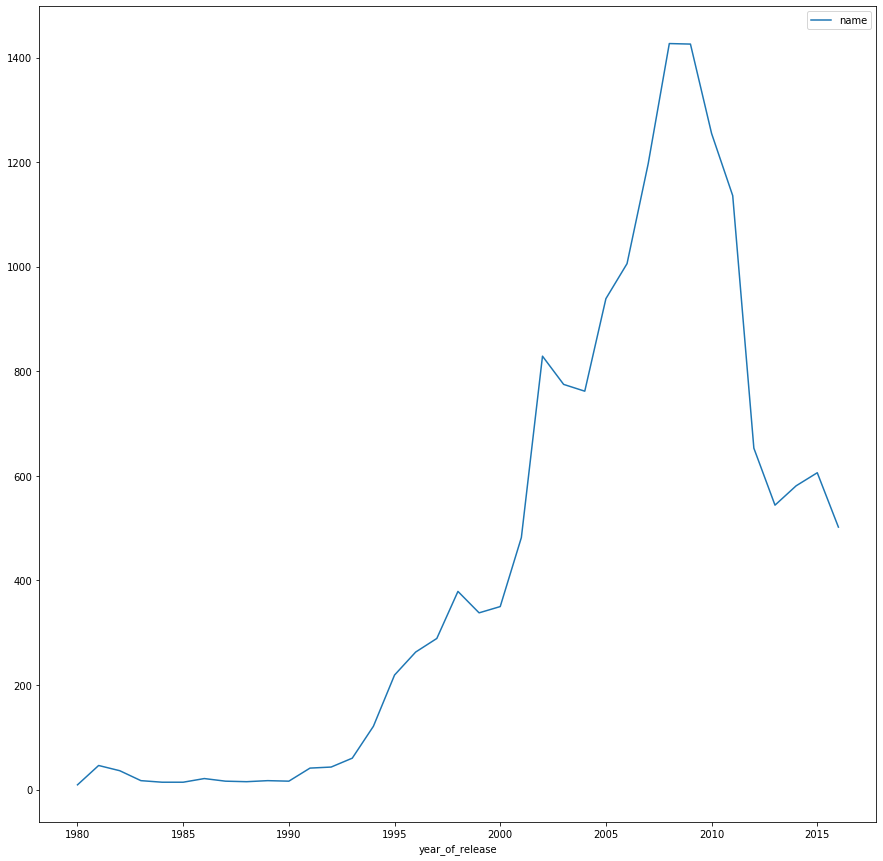

In [24]:
game_periods.plot(figsize=(15, 15))

Как видно из графика, примерно до 1994 года игр выпускалось не так много, более того, данные за 80-е будут нерелевантны для нас, а рейтинги ERSB появились как раз в 1994

In [25]:
df = df.query('year_of_release >= 1994').reset_index()

Больше всего игр выходило в нулевые года, в более актальное время (2013, 2014, 2015, 2016) гораздо меньше. Это связано с тем, что стоимость и время разработки проектов, тем более проектов серьезных, сильно возросло. Нам будет важен период с 2013/2014 года. Именно в это время вышло новое поколение консолей - PS4 и Xbox One. При этом я бы скорее ориентировался на 2014 год, так как релиз был в ноябре 2013, к тому же они вышли не одновременно по всему миру, а в разных регионах по разному. 



Посмотрим распределение продаж по различным платформам

In [26]:
sales_plat = df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'overall_sales', aggfunc = 'sum')
sales_plat


platform,3DO,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1994,0.02,NaN,NaN,NaN,12.18,NaN,NaN,8.13,NaN,0.11,...,3.65,0.36,35.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,0.08,NaN,NaN,NaN,3.60,NaN,NaN,NaN,NaN,NaN,...,11.57,NaN,32.20,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,36.03,NaN,NaN,NaN,34.10,NaN,...,7.69,NaN,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,6.37,NaN,NaN,NaN,39.50,NaN,...,6.77,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.38,NaN,26.90,NaN,NaN,NaN,49.24,NaN,...,3.82,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,5.16,NaN,38.00,NaN,NaN,NaN,57.87,NaN,...,0.09,NaN,0.26,NaN,0.46,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,5.99,NaN,19.76,0.07,NaN,NaN,33.97,NaN,...,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN
2001,NaN,NaN,1.07,NaN,9.24,61.53,26.34,NaN,3.25,NaN,...,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,22.26,NaN
2002,NaN,NaN,0.29,NaN,NaN,74.16,51.81,NaN,0.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN


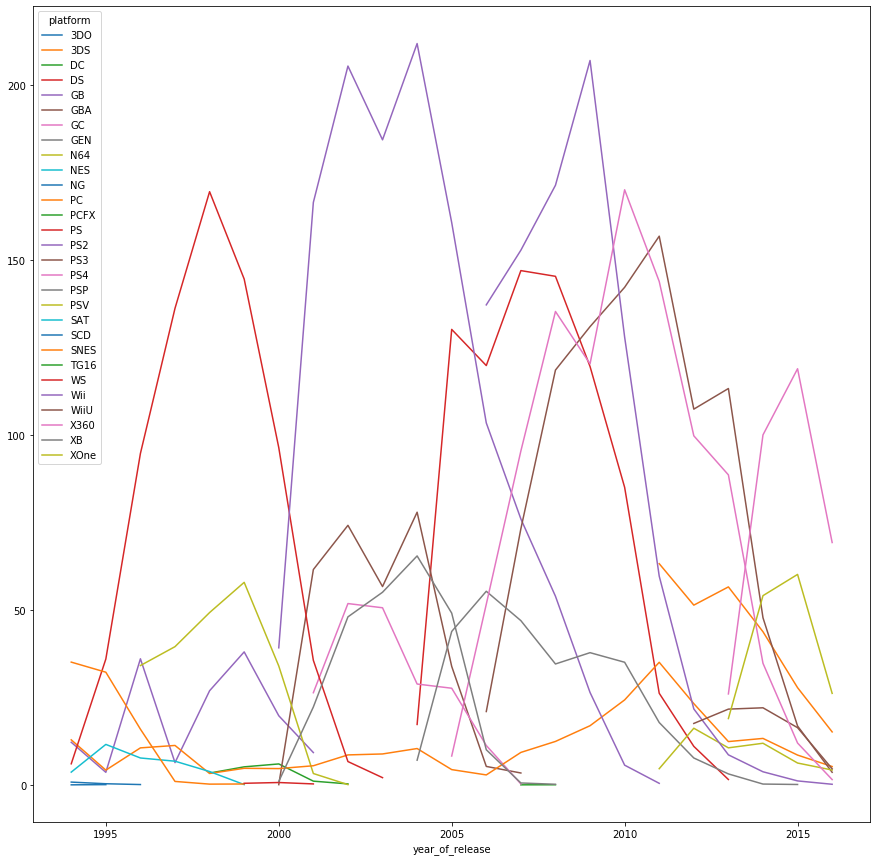

In [32]:
sales_plat.plot(figsize=(15, 15))


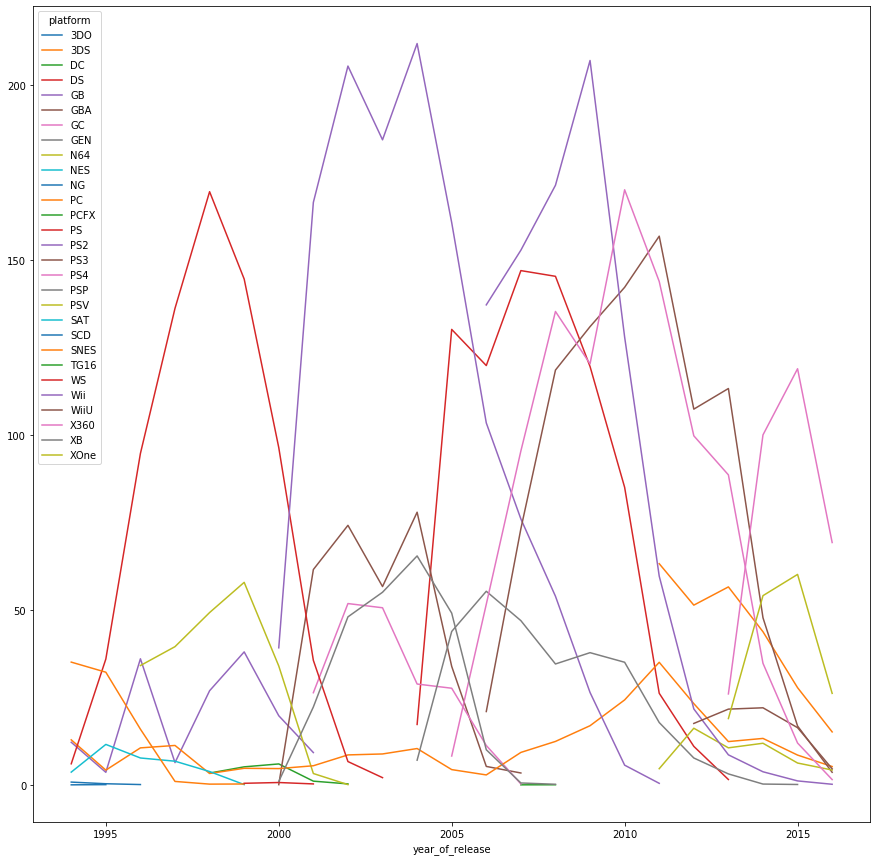

In [33]:
sales_plat.plot(figsize=(15, 15))

Если смотреть по продажам игр, то цикл жизни одной платформы примерно 10 лет. Но это зависит и от популярност самой платформы. История знаетнемало провальных примеров: 3DO, Sega Dreamcast.

Возьмем данные за актуальный период. Я уже писал, что считаю актуальным период с 2013/2014. Возьмем 2013 год, так как предыдуще поколение платформ - PS3, X360 еше не потеряли своей актуальности, а новое поколение только появилось. 



In [34]:
data = df.query('year_of_release >= 2013').reset_index()
data.tail(50)

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
2183,15918,16554,"Horse Life 4: My Horse, My Friend, My Champion",3DS,2015,Action,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01
2184,15922,16558,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01
2185,15925,16561,Amnesia Later,PSV,2014,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
2186,15934,16570,Exstetra,3DS,2013,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
2187,15942,16578,"Shinobi, Koi Utsutsu: Setsugetsuka Koi Emaki",PSV,2015,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
2188,15946,16582,Irotoridori no Sekai: World's End Re-Birth,PSV,2015,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
2189,15947,16583,Taishou x Alice: All in One,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN,0.01
2190,15949,16585,Farming 2017 - The Simulation,PS4,2016,Simulation,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01
2191,15954,16590,Hitman (2016),XOne,2016,Action,0.00,0.01,0.00,0.0,NaN,NaN,NaN,0.01
2192,15957,16593,Winx Club: Saving Alfea,3DS,2014,Action,0.00,0.01,0.00,0.0,NaN,NaN,E,0.01


По этой таблице видно, что очень много нишевых японских игр, некоторые за пределами японского рынка не выходили. Это нормальгая история для индустрии, но не для нас. Поэтому предлагаю 'отсечь' игры с продажами менее 300 тыс. копий, потому что 100 тысяч это нишево даже для японского рынка. 



In [35]:
data = data.query('overall_sales >= 0.3')
data.tail(30)

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
648,5285,5630,Persona 4: Dancing All Night,PSV,2015,Misc,0.09,0.04,0.15,0.04,76.0,8.6,T,0.32
649,5300,5648,Murdered: Soul Suspect,PS4,2014,Action,0.09,0.16,0.02,0.05,59.0,6.9,M,0.32
650,5322,5672,Rise of the Tomb Raider,X360,2015,Adventure,0.18,0.11,0.00,0.03,NaN,7.5,M,0.32
651,5339,5689,LEGO Marvel's Avengers,X360,2016,Action,0.18,0.11,0.00,0.03,NaN,5.7,E10+,0.32
652,5340,5690,Skylanders SWAP Force,XOne,2013,Platform,0.22,0.06,0.00,0.03,NaN,5.5,E10+,0.31
653,5353,5703,Batman: Arkham Origins,PC,2013,Action,0.13,0.16,0.00,0.02,74.0,7.5,T,0.31
654,5369,5719,Drakengard 3,PS3,2013,Role-Playing,0.10,0.00,0.19,0.02,61.0,7.7,M,0.31
655,5371,5721,J Stars Victory Vs.,PS3,2014,Fighting,0.05,0.05,0.20,0.02,NaN,7.9,NaN,0.32
656,5380,5730,Batman: Arkham Origins,WiiU,2013,Action,0.19,0.09,0.00,0.03,68.0,7.4,T,0.31
657,5381,5731,Taiko Drum Master: Don and Katsu's Space-Time ...,3DS,2014,Action,0.00,0.00,0.31,0.00,NaN,NaN,NaN,0.31


In [36]:
data.groupby('platform').agg({'overall_sales' : 'sum'}).sort_values(by = 'overall_sales', ascending = False)

,overall_sales
platform,
PS4,293.35
PS3,160.24
XOne,145.80
X360,126.28
3DS,122.89
WiiU,58.65
PC,27.59
PSV,12.43
Wii,12.18


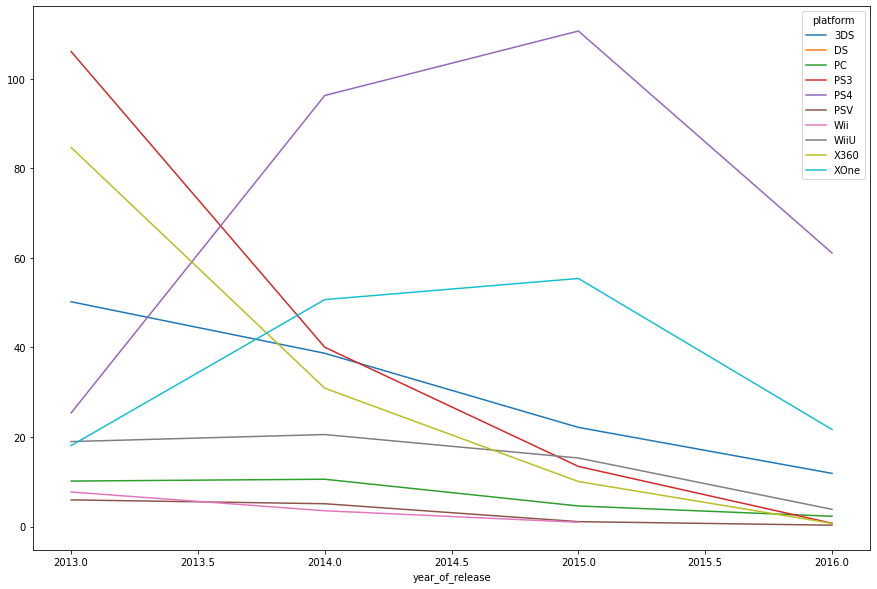

In [37]:
sales_platf = data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'overall_sales', aggfunc = 'sum')
sales_platf.plot(figsize=(15, 10))

PS4 и XOne - перспективные платформы, на которые надо делать ставку. 3DS теряет популярность, но она еще актуальна. PC имеет не такие большие продажи, что объясняется популярностью цифровых магазинов вроде Steam. Конкурировать интернет-магазинам с ними сложно, но PC как платформа никуда не денется, она, условно, будет всегда. Поэтому ее тоже желательно оставить. С PS3 и X360 немного сложнее, они были очень популярны, но к 2016 потеряли в пользовательской базе - игроки ушли на PS4 и XOne. У WiiU дела не очень хорошо, в том числе с продажами самой платформы, но игры Nintendo всегда имеют аудиторию и довольно большую.

In [38]:
df_f = data.query('platform == ("3DS", "PS4", "XOne", "PC", "WiiU")')

Посмотрим график продаж игр на каждой из платформам

(0, 4)

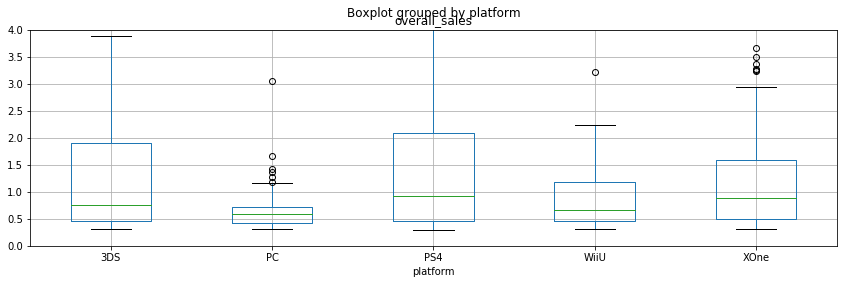

In [39]:
game_sales = df_f.groupby(['name', 'platform']).agg({'overall_sales' : 'sum'})


game_sales.boxplot('overall_sales', by = 'platform', figsize = (14, 4))
plt.ylim(0, 4)

In [40]:
m_sales = df_f.groupby(['platform']).agg({'overall_sales' : 'mean'})
m_sales

,overall_sales
platform,
3DS,1.706806
PC,0.726053
PS4,1.756587
WiiU,1.173000
XOne,1.350000


Теперь займемся пропусками 

In [41]:
df_f['rating'].isnull().sum()



107

In [42]:
df_f.loc[(df_f['rating'].isnull()) & (df_f['genre'].isin(['Shooter', 'Action'])), 'rating'] = 'M'
df_f.loc[(df_f['rating'].isnull()) & (~df_f['genre'].isin(['Shooter', 'Action'])), 'rating'] = 'E'


/Users/kirillanosov/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [43]:
df_f['rating'].unique()

array(['M', 'E', 'T', 'E10+'], dtype=object)

Посмотрим как влияют отзывы игроков и критиков на продажи игр на PS4. 

In [44]:
ps4 = df_f.query('platform == "PS4"')
ps4.head(10)

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,overall_sales
2,25,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
4,36,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
9,68,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
10,78,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,M,7.98
11,82,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
12,84,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
15,94,105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
19,130,143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
21,140,154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
23,156,171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39


In [45]:
cor = ps4.corr()
cor.style.background_gradient(cmap = 'coolwarm')

,level_0,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,overall_sales
level_0,1.000000,0.999948,0.255327,-0.632928,-0.601135,-0.346685,-0.661621,-0.349280,0.024488,-0.661990
index,0.999948,1.000000,0.254788,-0.636809,-0.605321,-0.349249,-0.665954,-0.350637,0.024903,-0.666371
year_of_release,0.255327,0.254788,1.000000,-0.150892,-0.103932,0.029657,-0.125611,0.078962,0.135522,-0.127570
na_sales,-0.632928,-0.636809,-0.150892,1.000000,0.720752,0.444350,0.925425,0.432018,-0.036286,0.903970
eu_sales,-0.601135,-0.605321,-0.103932,0.720752,1.000000,0.438231,0.928865,0.326467,-0.090092,0.946785
jp_sales,-0.346685,-0.349249,0.029657,0.444350,0.438231,1.000000,0.475948,0.283188,0.203672,0.507137
other_sales,-0.661621,-0.665954,-0.125611,0.925425,0.928865,0.475948,1.000000,0.415953,-0.067183,0.997613
critic_score,-0.349280,-0.350637,0.078962,0.432018,0.326467,0.283188,0.415953,1.000000,0.420143,0.409208
user_score,0.024488,0.024903,0.135522,-0.036286,-0.090092,0.203672,-0.067183,0.420143,1.000000,-0.064632
overall_sales,-0.661990,-0.666371,-0.127570,0.903970,0.946785,0.507137,0.997613,0.409208,-0.064632,1.000000


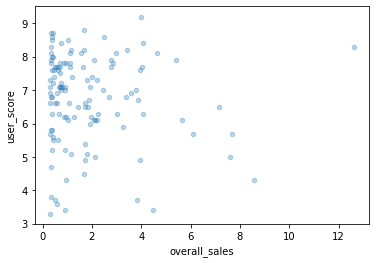

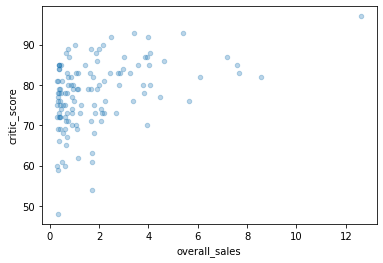

In [46]:
ps4.plot(x = 'overall_sales', y = 'user_score', kind = 'scatter', alpha = 0.3)
plt.show()
ps4.plot(x = 'overall_sales', y = 'critic_score', kind = 'scatter', alpha = 0.3)
plt.show()

Никакой корреляции между продажами и отзывами пользователей и корреляция с оценками критиков - как я и писал ранее. Оценки пользователей очень часто используются не как оценка непосредственно игры, а как протест против разработчика и/или издателя игры.    

Сравним с ситуацией на всех остальных платформах:

In [47]:
other = df_f.query('platform != "PS4"')

In [48]:
corr = other.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,level_0,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,overall_sales
level_0,1.000000,0.999949,0.055183,-0.633640,-0.594033,-0.383482,-0.658080,-0.338979,-0.151896,-0.671534
index,0.999949,1.000000,0.055484,-0.637700,-0.597460,-0.386570,-0.662170,-0.338441,-0.150770,-0.675946
year_of_release,0.055183,0.055484,1.000000,-0.020283,-0.080854,-0.090658,-0.034868,0.158471,0.116589,-0.071089
na_sales,-0.633640,-0.637700,-0.020283,1.000000,0.780287,0.305891,0.985334,0.287232,0.050746,0.894903
eu_sales,-0.594033,-0.597460,-0.080854,0.780287,1.000000,0.361999,0.864799,0.283670,-0.003470,0.872806
jp_sales,-0.383482,-0.386570,-0.090658,0.305891,0.361999,1.000000,0.314283,0.019683,0.295657,0.653098
other_sales,-0.658080,-0.662170,-0.034868,0.985334,0.864799,0.314283,1.000000,0.308589,0.025831,0.918466
critic_score,-0.338979,-0.338441,0.158471,0.287232,0.283670,0.019683,0.308589,1.000000,0.418661,0.290076
user_score,-0.151896,-0.150770,0.116589,0.050746,-0.003470,0.295657,0.025831,0.418661,1.000000,0.106611
overall_sales,-0.671534,-0.675946,-0.071089,0.894903,0.872806,0.653098,0.918466,0.290076,0.106611,1.000000


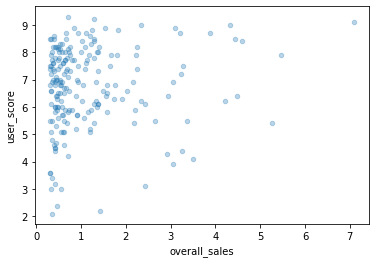

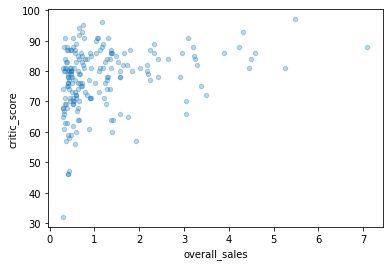

In [49]:
other.plot(x = 'overall_sales', y = 'user_score', kind = 'scatter', alpha = 0.3)
plt.show()
other.plot(x = 'overall_sales', y = 'critic_score', kind = 'scatter', alpha = 0.3)
plt.show()

На остальных плтформах коррелляция слабая, как и в отношении оценки критиков, так и в отношении оценки пользователей. Но оценки пользователей, в отличие от данным по PS4, имеют хоть какое-то значение



Посмотрим, какие жанры самые прибыльные:

In [50]:
genre_sales = df_f.groupby('genre').agg({'overall_sales' : 'sum'}).sort_values(by = 'overall_sales', ascending = False)
genre_sales

,overall_sales
genre,
Action,162.41
Shooter,158.97
Role-Playing,104.13
Sports,82.97
Platform,31.05
Racing,26.71
Misc,25.53
Fighting,23.31
Simulation,17.28


In [51]:
df_f['genre'].value_counts()

Action          132
Shooter          72
Role-Playing     57
Sports           54
Misc             30
Platform         24
Racing           17
Fighting         14
Simulation       13
Adventure        11
Strategy          8
Puzzle            3
Name: genre, dtype: int64

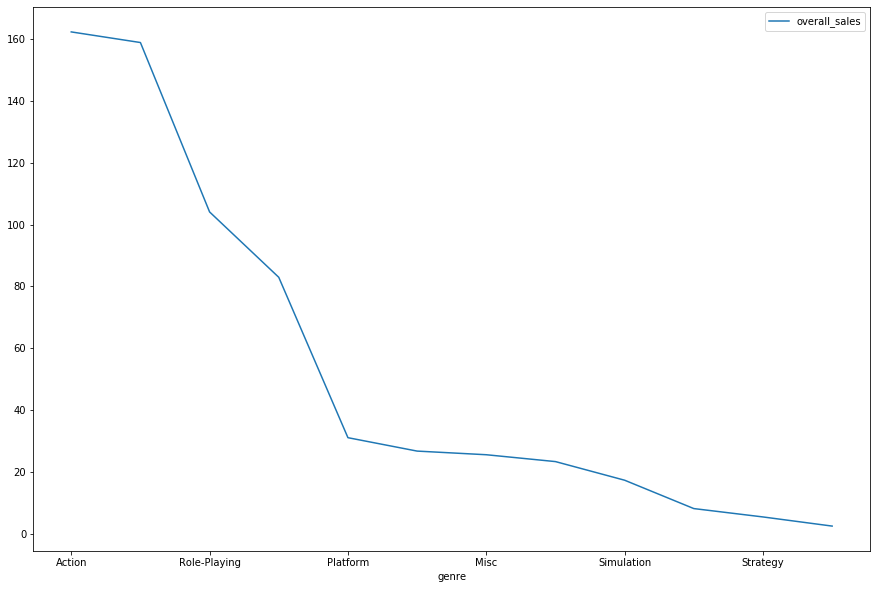

In [52]:
genre_sales.plot(figsize=(15, 10))

Четыре самых прибыльных и популярных жанра: Action, Shooter, Role-Playing, Sports. Тут все понятно и логично. Далее жанр Misc, вернее это общее обозначение для музыкальных игр, игр для компании/вечеринки. Доходы от этих игр проигрывают жанрам Platform  и Racing, хотя количесвто Misc больше. Жанры Puzzle и Strategy не особо востребованы. 



4) Определим портрет пользователя каждого региона

Начнем с Северной Америки:

In [53]:
na = data.groupby('platform').agg({'na_sales' : 'sum'}).sort_values(by = 'na_sales', ascending = False)

na

,na_sales
platform,
PS4,102.87
XOne,85.64
X360,76.19
PS3,58.73
3DS,34.23
WiiU,26.54
PC,8.48
Wii,6.10
PSV,2.43


In [54]:
na1 = data.groupby(['genre', 'rating']).agg({'na_sales' : 'sum'}).sort_values(by = 'na_sales', ascending = False)


na1

,,na_sales
genre,rating,
Shooter,M,68.81
Action,M,67.44
Sports,E,48.50
Action,E10+,19.19
Role-Playing,M,15.77
Shooter,T,14.98
Action,T,9.05
Platform,E,8.03
Sports,E10+,7.70


In [55]:
na2 = data.groupby('genre').agg({'na_sales' : 'sum'}).sort_values(by = 'na_sales', ascending = False)
na2

,na_sales
genre,
Action,113.51
Shooter,106.24
Sports,62.24
Role-Playing,41.93
Misc,25.14
Platform,16.33
Fighting,13.89
Racing,11.38
Adventure,4.48


Топ-5 самых популярных платформ в СА видны. Топ-5 жанров: Shooter, Action, Sports, Role-Playing, Misc. Интереснее с рейтингом. Самые продаваемые игры жанра Shooter и Action имеют рейтинг М, т.е. для взрослой аудитории. В СА серьезно относятся к маркировкам ERSB, поэтому можно сказать, что среднйи геймер в СА - совершеннолетний. Это подтверждается и исследованиями: средний возраст геймера 35 лет для мужчин и 44 для женщин. (https://www.polygon.com/2016/4/29/11539102/gaming-stats-2016-esa-essential-facts). Спортивные также популярны в СА, как и спорт вообще. В частности, американский футбол

Посмотрим данные по Европе:

In [56]:
eu = data.groupby('platform').agg({'eu_sales' : 'sum'}).sort_values(by = 'eu_sales', ascending = False)
eu

,eu_sales
platform,
PS4,133.85
PS3,63.61
XOne,46.65
X360,38.53
3DS,27.87
WiiU,17.98
PC,16.89
Wii,5.05
PSV,3.78


In [57]:
eu1 = data.groupby(['genre', 'rating']).agg({'eu_sales' : 'sum'}).sort_values(by = 'eu_sales', ascending = False)
eu1

,,eu_sales
genre,rating,
Action,M,63.87
Shooter,M,54.70
Sports,E,49.85
Action,E10+,15.61
Role-Playing,M,14.81
Shooter,T,10.38
Racing,E,10.06
Action,T,7.74
Platform,E,5.95


In [58]:
eu2 = data.groupby('genre').agg({'eu_sales' : 'sum'}).sort_values(by = 'eu_sales', ascending = False)
eu2

,eu_sales
genre,
Action,104.72
Shooter,84.02
Sports,56.96
Role-Playing,34.03
Misc,18.23
Racing,17.10
Platform,13.80
Simulation,9.51
Fighting,7.46


Топ-5 консолей аналогичны Американскому решиону. А вот по жанрам есть отлиичия. Топ-5: Action, Shooter, Sports, Role-Playing, Racing. В Европе жанр Racing	популярней Misc. По поводу возрастных рейтингов ситуация не отличается от СА.

Посмотрим на Японию:

In [59]:
jp = data.groupby('platform').agg({'jp_sales' : 'sum'}).sort_values(by = 'jp_sales', ascending = False)
jp

,jp_sales
platform,
3DS,55.12
PS3,12.97
PS4,10.79
WiiU,9.87
PSV,4.40
X360,0.36
XOne,0.32
DS,0.00
PC,0.00


In [60]:
jp1 = data.groupby(['genre', 'rating']).agg({'jp_sales' : 'sum'}).sort_values(by = 'jp_sales', ascending = False)
jp1

,,jp_sales
genre,rating,
Role-Playing,T,7.34
Action,M,6.27
Shooter,M,3.38
Platform,E,3.33
Action,E,2.72
Role-Playing,M,2.13
Action,T,2.08
Sports,E,1.98
Misc,E,1.96


In [61]:
jp2 = data.groupby('genre').agg({'jp_sales' : 'sum'}).sort_values(by = 'jp_sales', ascending = False)
jp2

,jp_sales
genre,
Role-Playing,39.54
Action,22.56
Shooter,6.34
Fighting,5.71
Misc,4.71
Platform,4.53
Simulation,3.63
Sports,2.21
Racing,2.05


Японский рынок серьезно отличается от СА и Европы. Топ-5 платформ: 3DS, PS3, PS4, WiiU, PSV. То есть платформы от японских же произвдителей, что логично, ведь во-первых, японцы действительно предпочитают своих производителей, во-вторых на этих платформах выходят игры популярные у местной аудитории, некоторые пределов Японии не покидают. Самый популярные жанры: Role-Playing, Action, Shooter,Fighting, Misc. Это в общем и целом отражает предпочтения японской аудитории. Связи возрастного рейтпнга с продажами, на мой взгляд, нет. 	Role-Playing для японского рынка действительно редко бывают с рейтингом M. Для Action и Shooter рейтинг M вполне нормален, это издержки жанров

Вкусы европейцев и североамериканцев схожи за небольшими исключениями: Misc популярен в СА, а в Европе больше Racing. Я думаю это можно объяснить тем, что в Европе гонки имеют давние традиции, основные команды гоночных серий именно из Европы. Схож и возраст геймеров - около 35 лет(скажем, за 30). 
Япония - другое дело. Там свои вкусы, японский рынок очень долго формировался в отрыве от мирового, задавая при этом тренды - все самые важные платформы японского производства (XOne тут исклбчение), так сложилось исторически. По поводу возраста. Согласно исследованию (https://www.statista.com/statistics/722259/world-gamers-by-age-and-gender/) больше всего ггеймеров в Японии в возрасте 21 - 35 лет. Это отражает ситуацию в стране. Учась в университете, японцы имеют достаточно свободного времени, а вот после выхожа на работу его становится меньше - издержки японской рабочей этики. Но играть японцы не перестают, пусть и делают это меньше. 



5) Проверим несколько гипотез

Средние пользовательские рейтинги платформ XOne и PC одинаковы. Нулевая гипотеза будет такой же: средние рейтинги одинаковы. Чтобы проверить гипотезу избавимся от пропусков в user_score

In [62]:
df_f.dropna(subset = ['user_score'], inplace = True)

/Users/kirillanosov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Для проверки гипотезы используем гипотезу о равентсве двух генеральных совокупностей. Гипотеза о равенстве зависимых выборок тут не подойдет, так как используется для сравнения 'до' и 'после'. Сделаем это с помощью t-критерия Стьюдента, т.к. ее часто применяют для проверки равентсва средних значений в двух выборках

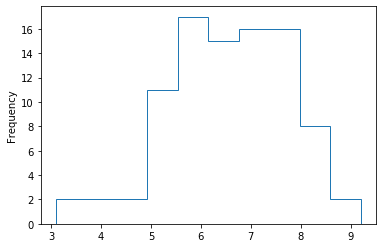

In [63]:
meanX = df_f.query('platform == "XOne"')['user_score']
meanX.plot(kind = 'hist', histtype = 'step')

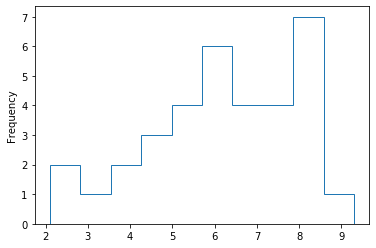

In [64]:
meanPC = df_f.query('platform == "PC"')['user_score']
meanPC.plot(kind = 'hist', histtype = 'step')

Эти гистограммы похожи на нормальное распределение

In [60]:
#np.var(meanPC) - 3.137508650519031
#np.var(meanX) - 1.3926071730467335

3.137508650519031

Получается, что дисперсии разные, а значит параметр equal_var будет False

In [65]:


alpha = 0.05
results = st.ttest_ind(
    meanX, 
    meanPC, equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем гипотезу')
else:
    print('Все верно')

p-значение: 0.2846435149674878
Все верно


Гипотеза подтверждена. Пользовательские рейтинги XOne и PC одинаковы. На мой взгляд, это может быть связано с тем, что Microoft активно пытается интегрировать Xbox с PC(на Windows, естественно). Соответсвенно пользовательская база похожа

Вторая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Нулевая гипотеза - рейтинги одинаковые. ля проверки гипотезы используем гипотезу о равентсве двух генеральных совокупностей. Гипотеза о равенстве зависимых выборок тут не подойдет, так как используется для сравнения 'до' и 'после'. Сделаем это с помощью t-критерия Стьюдента, т.к. ее часто применяют для проверки равентсва средних значений в двух выборках

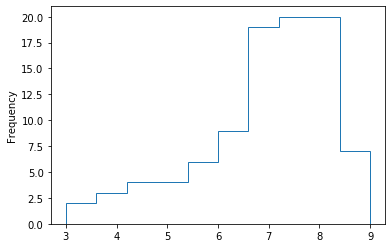

In [66]:
action = df_f.query('genre == "Action"')['user_score']
action.plot(kind = 'hist', histtype = 'step')

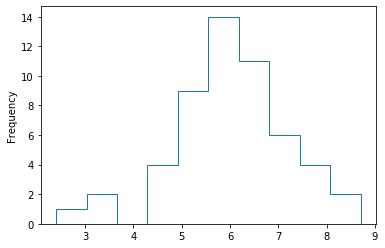

In [67]:
sports = df_f.query('genre == "Sports"')['user_score']
sports.plot(kind = 'hist', histtype = 'step')

Эти гистограммы похожи на нормальное распределение

In [65]:
#np.var(action) - 1.69731213218651
#np.var(sports) - 1.3926379494482024

1.3926379494482024

Дисперсии примерно равны, тогда установим параметр equal_var как True

In [68]:
action = df_f.query('genre == "Action"')['user_score']
sports = df_f.query('genre == "Sports"')['user_score']
alpha = 0.05
results = st.ttest_ind(
    action, 
    sports, equal_var = True)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем гипотезу')
else:
    print('Все верно')

p-значение: 5.736142964169277e-05
Отвергаем гипотезу


Рейтинги двух жанров действительно разные. Возможно дело в том, что игры в жанре Action горзадно более разнообразные, у пользоватедей вкусы тоже разные. Игры жанра Sports в большинстве своем похожи, покупатели таких игр, как правило любят вид спорта, которому игра посвящена, поэтому они прекрасно понимают что за игру покупают.



6) Вывод

В 2017 году лучше сосроедоточиться на играх для актуальных платформ - 3DS, PS4, XOne, PC, WiiU. PS4 и XOne это флагманы, они находятся в самом пике своего жизненного цикла. 3DS уже на сходе, WiiU как платформа явно провальна, но нельзя отказываться от игр и платформ Nintendo. У компании и игр компании очень лоялные фанаты, которые готовы покупать игры и платформы. PC игры продаются несколько хуже в интернет-магазинах, т.к. сказывается конкуренция с площадками цифровой торговли вроде Steam. Соперничать с Steam ценами мы не сможем, ни один интернет магазин не сможет перебить скидки на игры. Мультиплатформу - игры выходящие сразу на нескольких платфрмах - некторые тоже предпочтают покупать не на PC, а для консоли.  Но можно сделать упор на лимитированных изданиях игр, коллекционных. То есть то, что можно получить только в магазине (интернет-магазине). 
По ассортименту жанров стоит учитывать вкусы аудитории разных регионов. Топ-5 жанров в СА: Shooter, Action, Sports, Role-Playing, Misc. Топ-5 Европы: Action, Shooter, Sports, Role-Playing, Racing. Япония: Role-Playing, Action, Shooter,Fighting, Misc. Если вкусы Европы и Америки в целом совпадают, то Япония отличается. Японский рынок важен для индустрии, поэтому нужно оставить игры, подходящие под этот рынок. 

В итоге, проедлагаю по возможности закупать игры жанра Shooter(особенно серию Call of Duty), Action и Sport (упор сделать на сериях FIFA и Madden NFL для рынка СА), Role-Playing (как японского производтсва, так и западного), а также Racing. Не стоит забывать и об играх от Nintendo

